In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
Tool2Name = { 'STARMC':'starMC time', 'RGMEDD3':'RGMEDD time', 'LTSmin':'LTS-min time',
              'R5':'starMC time', 'R3':'RGMEDD time',}
file_ext = ".png"

## generate plots
This notebook prepares the plot from the data generated by the benchmarks.

In [15]:
def prepare(ar, exit, TO, MEM):
    ar = ar.replace({'DNF':-TO}).astype(np.float64)
    ar[(ar > 0) & (ar < 0.001)] = 0.001
    ar[ar > 60] = -TO
    ar[exit.isin([81])] = MEM
    ar = np.abs(ar)
    return ar
def mkplot(ax, df, log):
    TO = 65 if not log else 100
    MEM = 69 if not log else 200
    TimeX = prepare(df.TimeX, df.ExitX, TO, MEM)
    TimeY = prepare(df.TimeY, df.ExitY, TO, MEM)
    A = (TimeX<=60) & (TimeY<=60)
    FTO = (TimeX==TO) | (TimeY==TO)
    FMEM = (TimeX==MEM) | (TimeY==MEM)
    FTO = FTO & (~FMEM)
    ax.scatter(TimeX[A], TimeY[A], s=8, c='blue', alpha=alpha, lw=0)
    ax.scatter(TimeX[FTO], TimeY[FTO], c='olivedrab', alpha=alpha, s=16, marker='+', lw=1)
    ax.scatter(TimeX[FMEM], TimeY[FMEM], c='darkorange', alpha=alpha, s=16, marker='+', lw=1)
    ax.plot([0,MEM], [0,MEM], c='#b00000', lw=1)
    if log:
        ax.get_xaxis().set_major_formatter(ScalarFormatter())
        ax.get_xaxis().get_major_formatter().labelOnlyBase = False
        ax.set_yscale('log')
        ax.set_xscale('log')
        tickpos = [(10)**i for i in range(-3,2)] + [TO, MEM]
        ticklabels = ['$10^{%d}$'%i for i in range(-3,2)] + ['TO', 'Mem']
        ax.set_xticks(tickpos)
        ax.set_xticklabels(ticklabels)
        ax.set_yticks(tickpos)
        ax.set_yticklabels(ticklabels)
        for i in [-1, -2]:
            ax.get_xticklabels()[i].set_rotation(-90)
        mtickpos = [(j+1)**i for j in range(10) for i in range(-3,2)]
        mticklabels = ['' for t in mtickpos]
        ax.set_xticks(mtickpos, minor=True)
        ax.set_xticklabels(mticklabels, minor=True)
        ax.set_yticks(mtickpos, minor=True)
        ax.set_yticklabels(mticklabels, minor=True)
        ax.set_xlim(0.0007, 400)
        ax.set_ylim(0.0007, 400)
    else:
        ticklabs = ['0', '10', '20', '30', '40', '50', '60', 'TO', 'Mem']
        tickpos = [0, 10, 20, 30, 40, 50, 60, TO, MEM]
        ax.set_xticks(tickpos)
        ax.set_xticklabels(ticklabs)
        ax.set_yticks(tickpos)
        ax.set_yticklabels(ticklabs)
        ax.set_xlim(-2, 72)
        ax.set_ylim(-2, 72)
        for i in [-1, -2]:
            ax.get_xticklabels()[i].set_rotation(-90)

def make_full_plot():
    ren_cols = ["Exit", "Cardinality", "Time", "NSFNodes", "OK"]
    dfX = df[df.Tool==ToolX].rename(columns={p:p+"X" for p in ren_cols}).drop(columns="Tool")
    dfY = df[df.Tool==ToolY].rename(columns={p:p+"Y" for p in ren_cols}).drop(columns="Tool")
    merge_cols = ["Model", "Exam", "Query"]
    df2 = dfX.merge(dfY, how="inner", left_on=merge_cols, right_on=merge_cols)
    #print(df2.head(2))
    fig, axs = plt.subplots(1,2, figsize=(8.5,4))
    mkplot(axs[0], df2, False)
    mkplot(axs[1], df2, True)
    axs[0].set_xlabel(Tool2Name[ToolX])
    axs[1].set_xlabel(Tool2Name[ToolX])
    axs[0].set_ylabel(Tool2Name[ToolY])
    axs[0].set_title('Linear view')
    axs[1].set_title('Log view')
    plt.suptitle(title, size=14, y=1.02)
#     pngName = '/home/elvio/amparore-svn/CTLstar/figures/'+pdfName
    pngName = pdfName
    fig.savefig(pngName, bbox_inches='tight', dpi=300)
    plt.show()

# Plot generation

['LTSmin' 'STARMC']
['CTLstarCardinality']
[-1.  0. 85.]


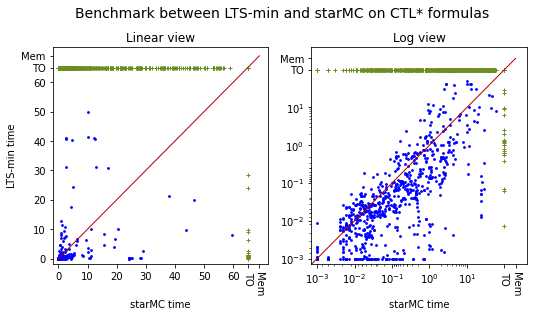

In [16]:
df = pd.read_csv("7.3.2-Fig11-ltsmin-starMC-ctlstar/results.csv")
title = 'Benchmark between LTS-min and starMC on CTL* formulas'
ToolX = 'STARMC'
ToolY = 'LTSmin'
pdfName = 'CTLstar-7-3-2' +  file_ext
alpha = 1.0
# display(df.head(3))
print(df.Tool.unique())
print(df.Exam.unique())
print(df.Exit.unique())

make_full_plot()

['STARMC' 'R3']
['CTLCardinality' 'CTLFireability']


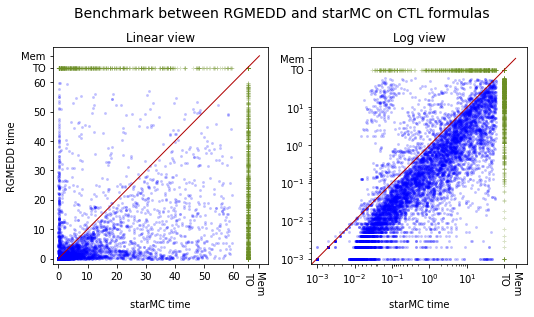

In [17]:
df = pd.read_csv("7.2-Fig9-rgmedd-starMC-ctl/results.csv")
title = 'Benchmark between RGMEDD and starMC on CTL formulas'
ToolX = 'STARMC'
ToolY = 'R3'
pdfName = 'CTL-7-2' +  file_ext
alpha = 0.25
print(df.Tool.unique())
print(df.Exam.unique())
make_full_plot()

['STARMC' 'LTSmin']
['CTLCardinality' 'LTLCardinality']


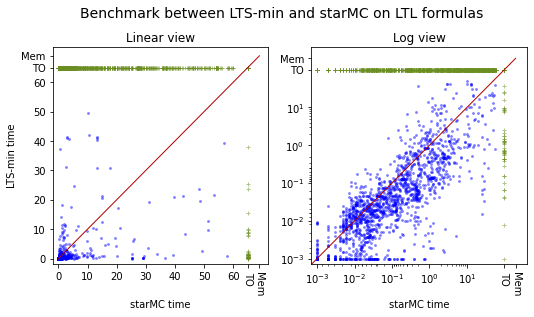

In [18]:
df = pd.read_csv("7.3.1-Fig10-ltsmin-starMC-ltl-ctl/results.csv")
title = 'Benchmark between LTS-min and starMC on LTL formulas'
ToolX = 'STARMC'
ToolY = 'LTSmin'
pdfName = 'LTL-7-3-1' +  file_ext
alpha = 0.5
# df = df[df.Exam=='LTLCardinality']
print(df.Tool.unique())
print(df.Exam.unique())
make_full_plot()